Este notebook demonstra a aplicação dos algoritmos de clustering Mean Shift e K-Means em diferentes conjuntos de dados.

🇬🇧 **Code Explanation:**

1.  **Data Loading and Preparation:** The code loads data from CSV files (`globular.csv`, `espiral.csv`, `monkey.csv`) using the pandas library. For the `globular.csv` dataset, it also generates synthetic data (`make_blobs`) for demonstration purposes and calculates the bandwidth (`tam_banda`) for the Mean Shift algorithm.
2.  **Mean Shift and K-Means Clustering:**
    *   The Mean Shift algorithm is applied to the data with a specified bandwidth. It identifies clusters by finding the peaks of density in the data.
    *   The K-Means algorithm is applied to the data with a predefined number of clusters (4 for the synthetic data). It groups data points into k clusters based on their distance to the centroids.
3.  **Visualization of Results:** The code uses the matplotlib and seaborn libraries to visualize the clustering results. It plots the data points colored according to the clusters assigned by each algorithm, and the cluster centroids (for K-Means) or cluster centers (for Mean Shift) are marked with an 'X'. The plots are presented in dark mode with a "viridis" color palette.

---

🇧🇷 **Explicação do Código:**

1.  **Carregamento e Preparação dos Dados:** O código carrega dados de arquivos CSV (`globular.csv`, `espiral.csv`, `monkey.csv`) usando a biblioteca pandas. Para o conjunto de dados `globular.csv`, ele também gera dados sintéticos (`make_blobs`) para fins de demonstração e calcula a largura de banda (`tam_banda`) para o algoritmo Mean Shift.
2.  **Clustering com Mean Shift e K-Means:**
    *   O algoritmo Mean Shift é aplicado aos dados com uma largura de banda especificada. Ele identifica aglomerados encontrando os picos de densidade nos dados.
    *   O algoritmo K-Means é aplicado aos dados com um número pré-definido de aglomerados (4 para os dados sintéticos). Ele agrupa os pontos de dados em k aglomerados com base na distância aos centróides.
3.  **Visualização dos Resultados:** O código utiliza as bibliotecas matplotlib e seaborn para visualizar os resultados do clustering. Ele plota os pontos de dados coloridos de acordo com os aglomerados atribuídos por cada algoritmo, e os centróides dos aglomerados (para K-Means) ou os centros dos aglomerados (para Mean Shift) são marcados com um 'X'. Os gráficos são apresentados em modo escuro com uma paleta de cores "viridis".


In [ ]:
import pandas as pd
from sklearn.cluster import MeanShift, KMeans, estimate_bandwidth
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

X, y = make_blobs(n_samples=1000, centers = 4, cluster_std=1, random_state = 42)
df = pd.DataFrame(X, columns=['X1', 'X2'])
df

,X1,X2
0,-8.555040,7.064618
1,-6.137532,-6.580817
2,-6.321300,-6.804104
3,4.180518,1.123325
4,4.380287,0.470027
...,...,...
995,-4.818124,-5.671743
996,-1.885078,9.642632
997,3.690480,4.605552
998,-7.489139,-7.067081


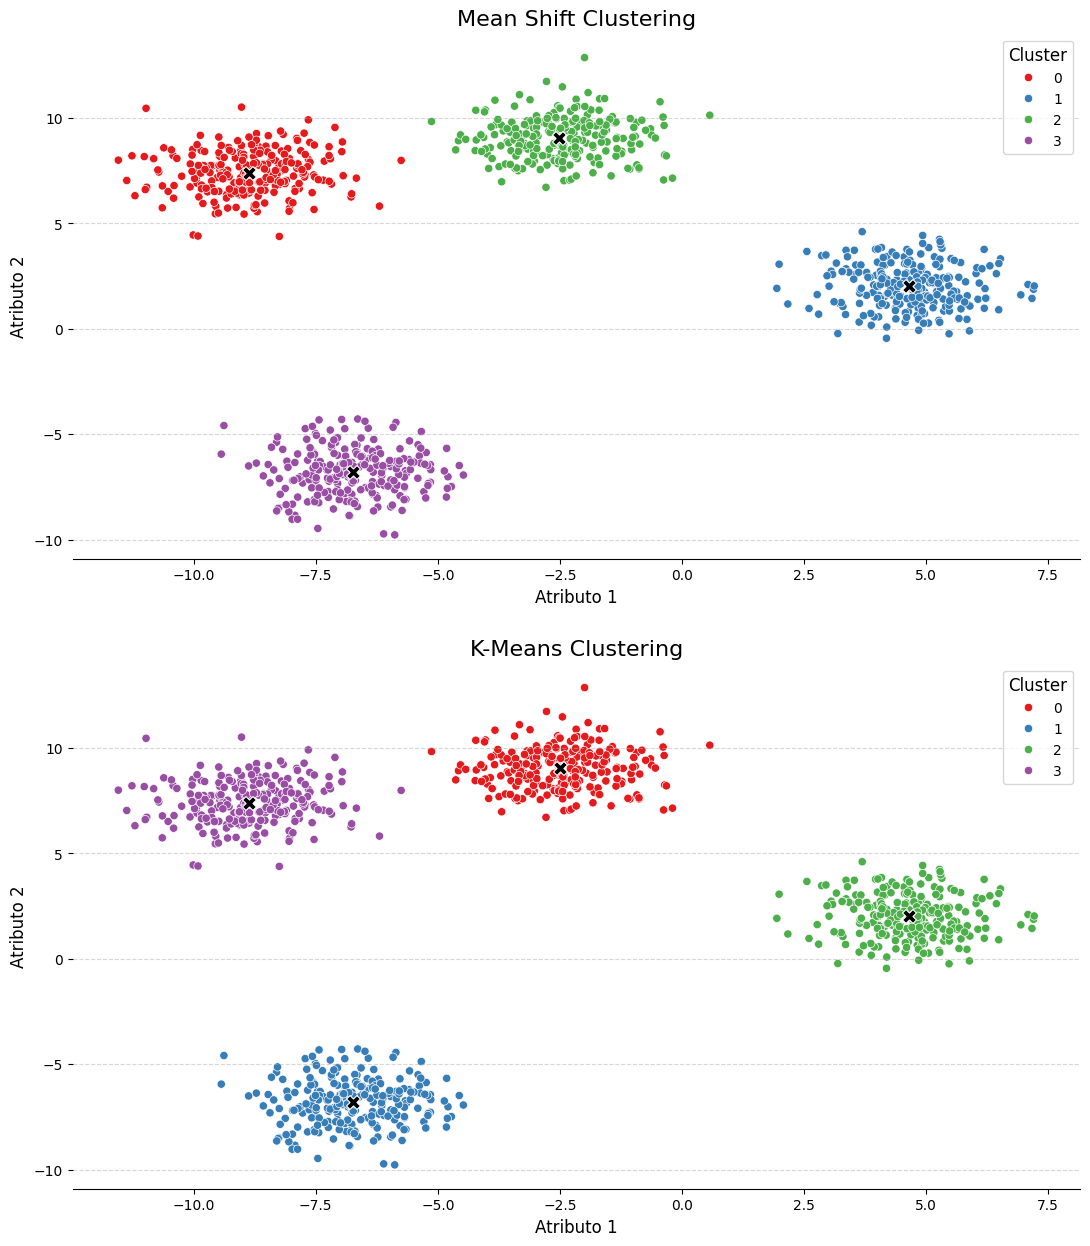

In [ ]:
model = MeanShift(bandwidth = tam_banda, bin_seeding=True)
model.fit(X)

model_Kmeans = KMeans(n_clusters=4, max_iter = 500, random_state=42)
model_Kmeans.fit(df)

fig, (up, down) = plt.subplots(2, 1, figsize=(13,15))
sns.scatterplot(x=df['X1'], y=df['X2'], hue=model.labels_, palette='Set1', ax = up)
sns.scatterplot(x=model.cluster_centers_[:,0], y=model.cluster_centers_[:,1], color='black', s=100, marker='X', ax = up)

sns.scatterplot(x=df['X1'], y=df['X2'], hue=model_Kmeans.labels_, palette='Set1', ax = down)
sns.scatterplot(x=model_Kmeans.cluster_centers_[:,0], y=model_Kmeans.cluster_centers_[:,1], s=100, color='black', marker='X', ax = down)

up.set_title('Mean Shift Clustering', fontsize=16)
down.set_title('K-Means Clustering', fontsize=16)

for ax in (up, down):
    ax.legend(title='Cluster', title_fontsize=12, fontsize=10)
    ax.set_xlabel('Atributo 1', fontsize=12)
    ax.set_ylabel('Atributo 2', fontsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.grid(axis='y', alpha=0.5, linestyle='--')

plt.show()

In [ ]:
df2 = pd.read_csv('espiral.csv')
df2

,d1,d2
0,10.500000,9.000000
1,10.567170,9.268445
2,8.275320,11.382210
3,8.227458,11.377640
4,8.179511,11.372110
...,...,...
995,15.398860,8.273205
996,15.421370,8.393001
997,15.441650,8.513389
998,15.459660,8.634325


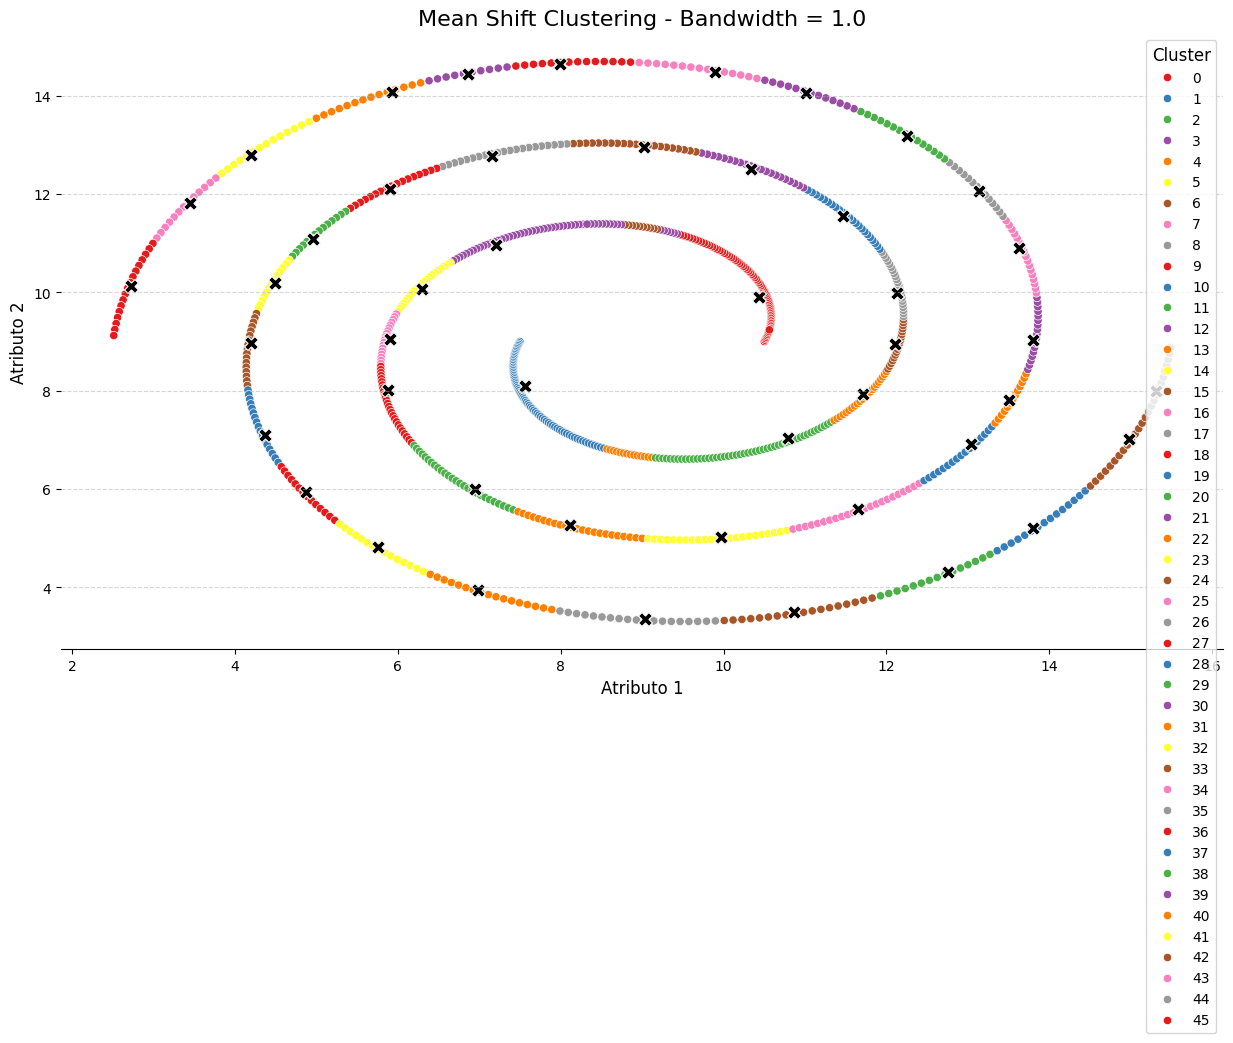

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15,8))

model = MeanShift(bandwidth = 1.0, bin_seeding=True)
model.fit(df2)

sns.scatterplot(x=df2['d1'], y=df2['d2'], hue=model.labels_, palette='Set1', ax = ax)
sns.scatterplot(x=model.cluster_centers_[:,0], y=model.cluster_centers_[:,1], color='black', s=100, marker='X', ax=ax)

ax.set_title(f'Mean Shift Clustering - Bandwidth = 1.0', fontsize=16)
ax.set_xlabel('Atributo 1', fontsize=12)
ax.set_ylabel('Atributo 2', fontsize=12)
ax.legend(title='Cluster', title_fontsize=12, fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(axis='y', alpha=0.5, linestyle='--')

plt.show()

In [ ]:
monkey = pd.read_csv('monkey.csv')
monkey

,d1,d2
0,8.809783,7.611147
1,4.110747,11.103186
2,4.114710,11.039587
3,3.154736,6.743244
4,5.972931,7.537982
...,...,...
3995,-1.601140,14.773205
3996,-1.578630,14.893001
3997,-1.558350,15.013389
3998,-1.540340,15.134325


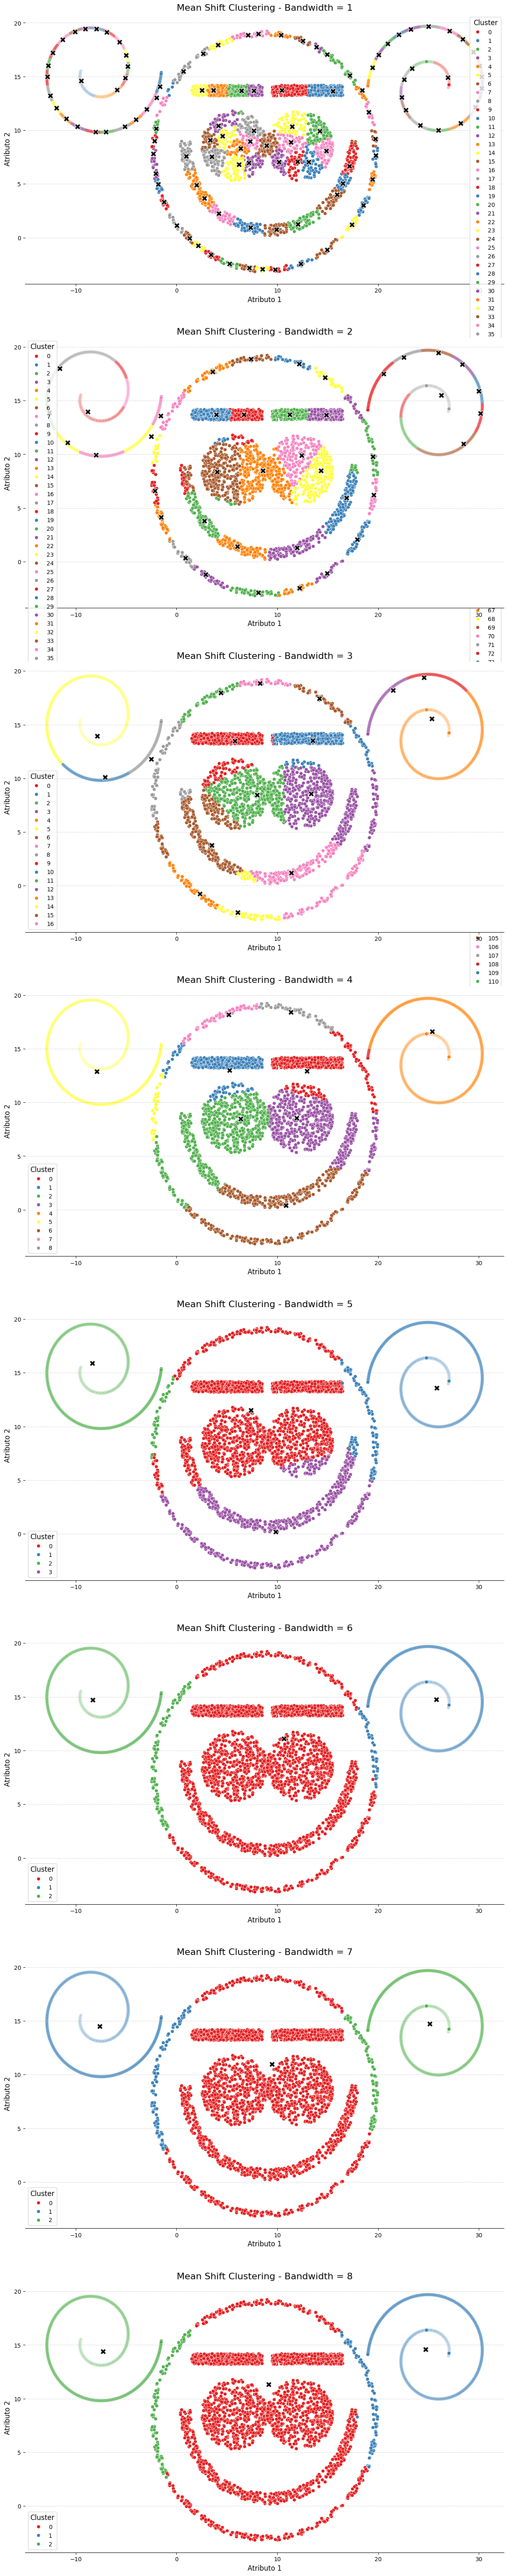

In [ ]:
fig, ax = plt.subplots(len([1,2,3,4,5,6,7,8]), 1, figsize=(15,80))
for pos, x in enumerate([1,2,3,4,5,6,7,8]):
    model = MeanShift(bandwidth = x, bin_seeding=True)
    model.fit(monkey)


    sns.scatterplot(x=monkey['d1'], y=monkey['d2'], hue=model.labels_, palette='Set1', ax = ax[pos])
    sns.scatterplot(x=model.cluster_centers_[:,0], y=model.cluster_centers_[:,1], color='black', s=100, marker='X', ax=ax[pos])

    ax[pos].set_title(f'Mean Shift Clustering - Bandwidth = {x}', fontsize=16)
    ax[pos].set_xlabel('Atributo 1', fontsize=12)
    ax[pos].set_ylabel('Atributo 2', fontsize=12)
    ax[pos].legend(title='Cluster', title_fontsize=12, fontsize=10)
    ax[pos].spines['top'].set_visible(False)
    ax[pos].spines['right'].set_visible(False)
    ax[pos].spines['left'].set_visible(False)
    ax[pos].grid(axis='y', alpha=0.5, linestyle='--')

plt.show()